# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset ini berasal dari National Institute of Diabetes and Digestive and Kidney Diseases. Tujuan dari dataset ini adalah untuk memprediksi secara diagnostik apakah seorang pasien memiliki diabetes atau tidak, berdasarkan beberapa pengukuran diagnostik yang termasuk dalam dataset ini. Beberapa batasan diterapkan dalam pemilihan data ini dari basis data yang lebih besar. Secara khusus, semua pasien di sini adalah perempuan yang berusia minimal 21 tahun dan berasal dari keturunan Pima Indian.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Load Dataset
# Assuming the CSV is in the same directory or provide the correct path
df = pd.read_csv('diabetes.csv')

# Preview data
print("Dataset Head:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nDataset Description:")
print(df.describe())

Dataset Head:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


Missing Values in Each Column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


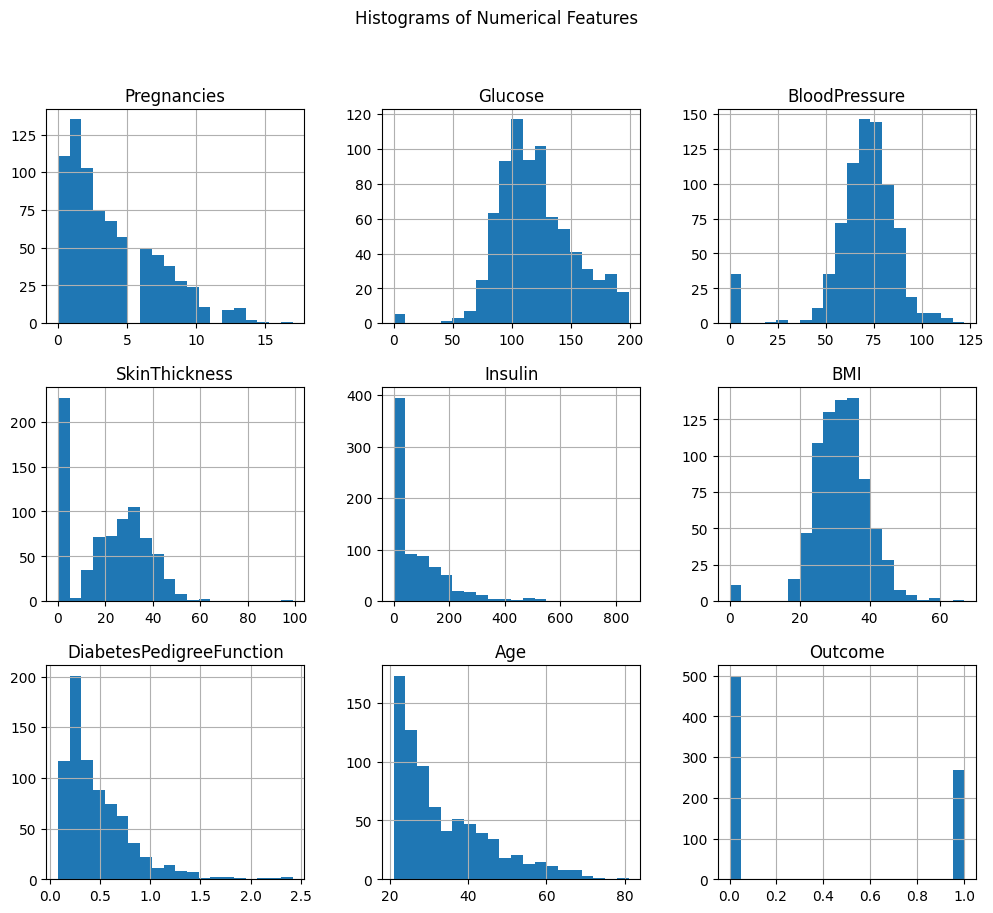

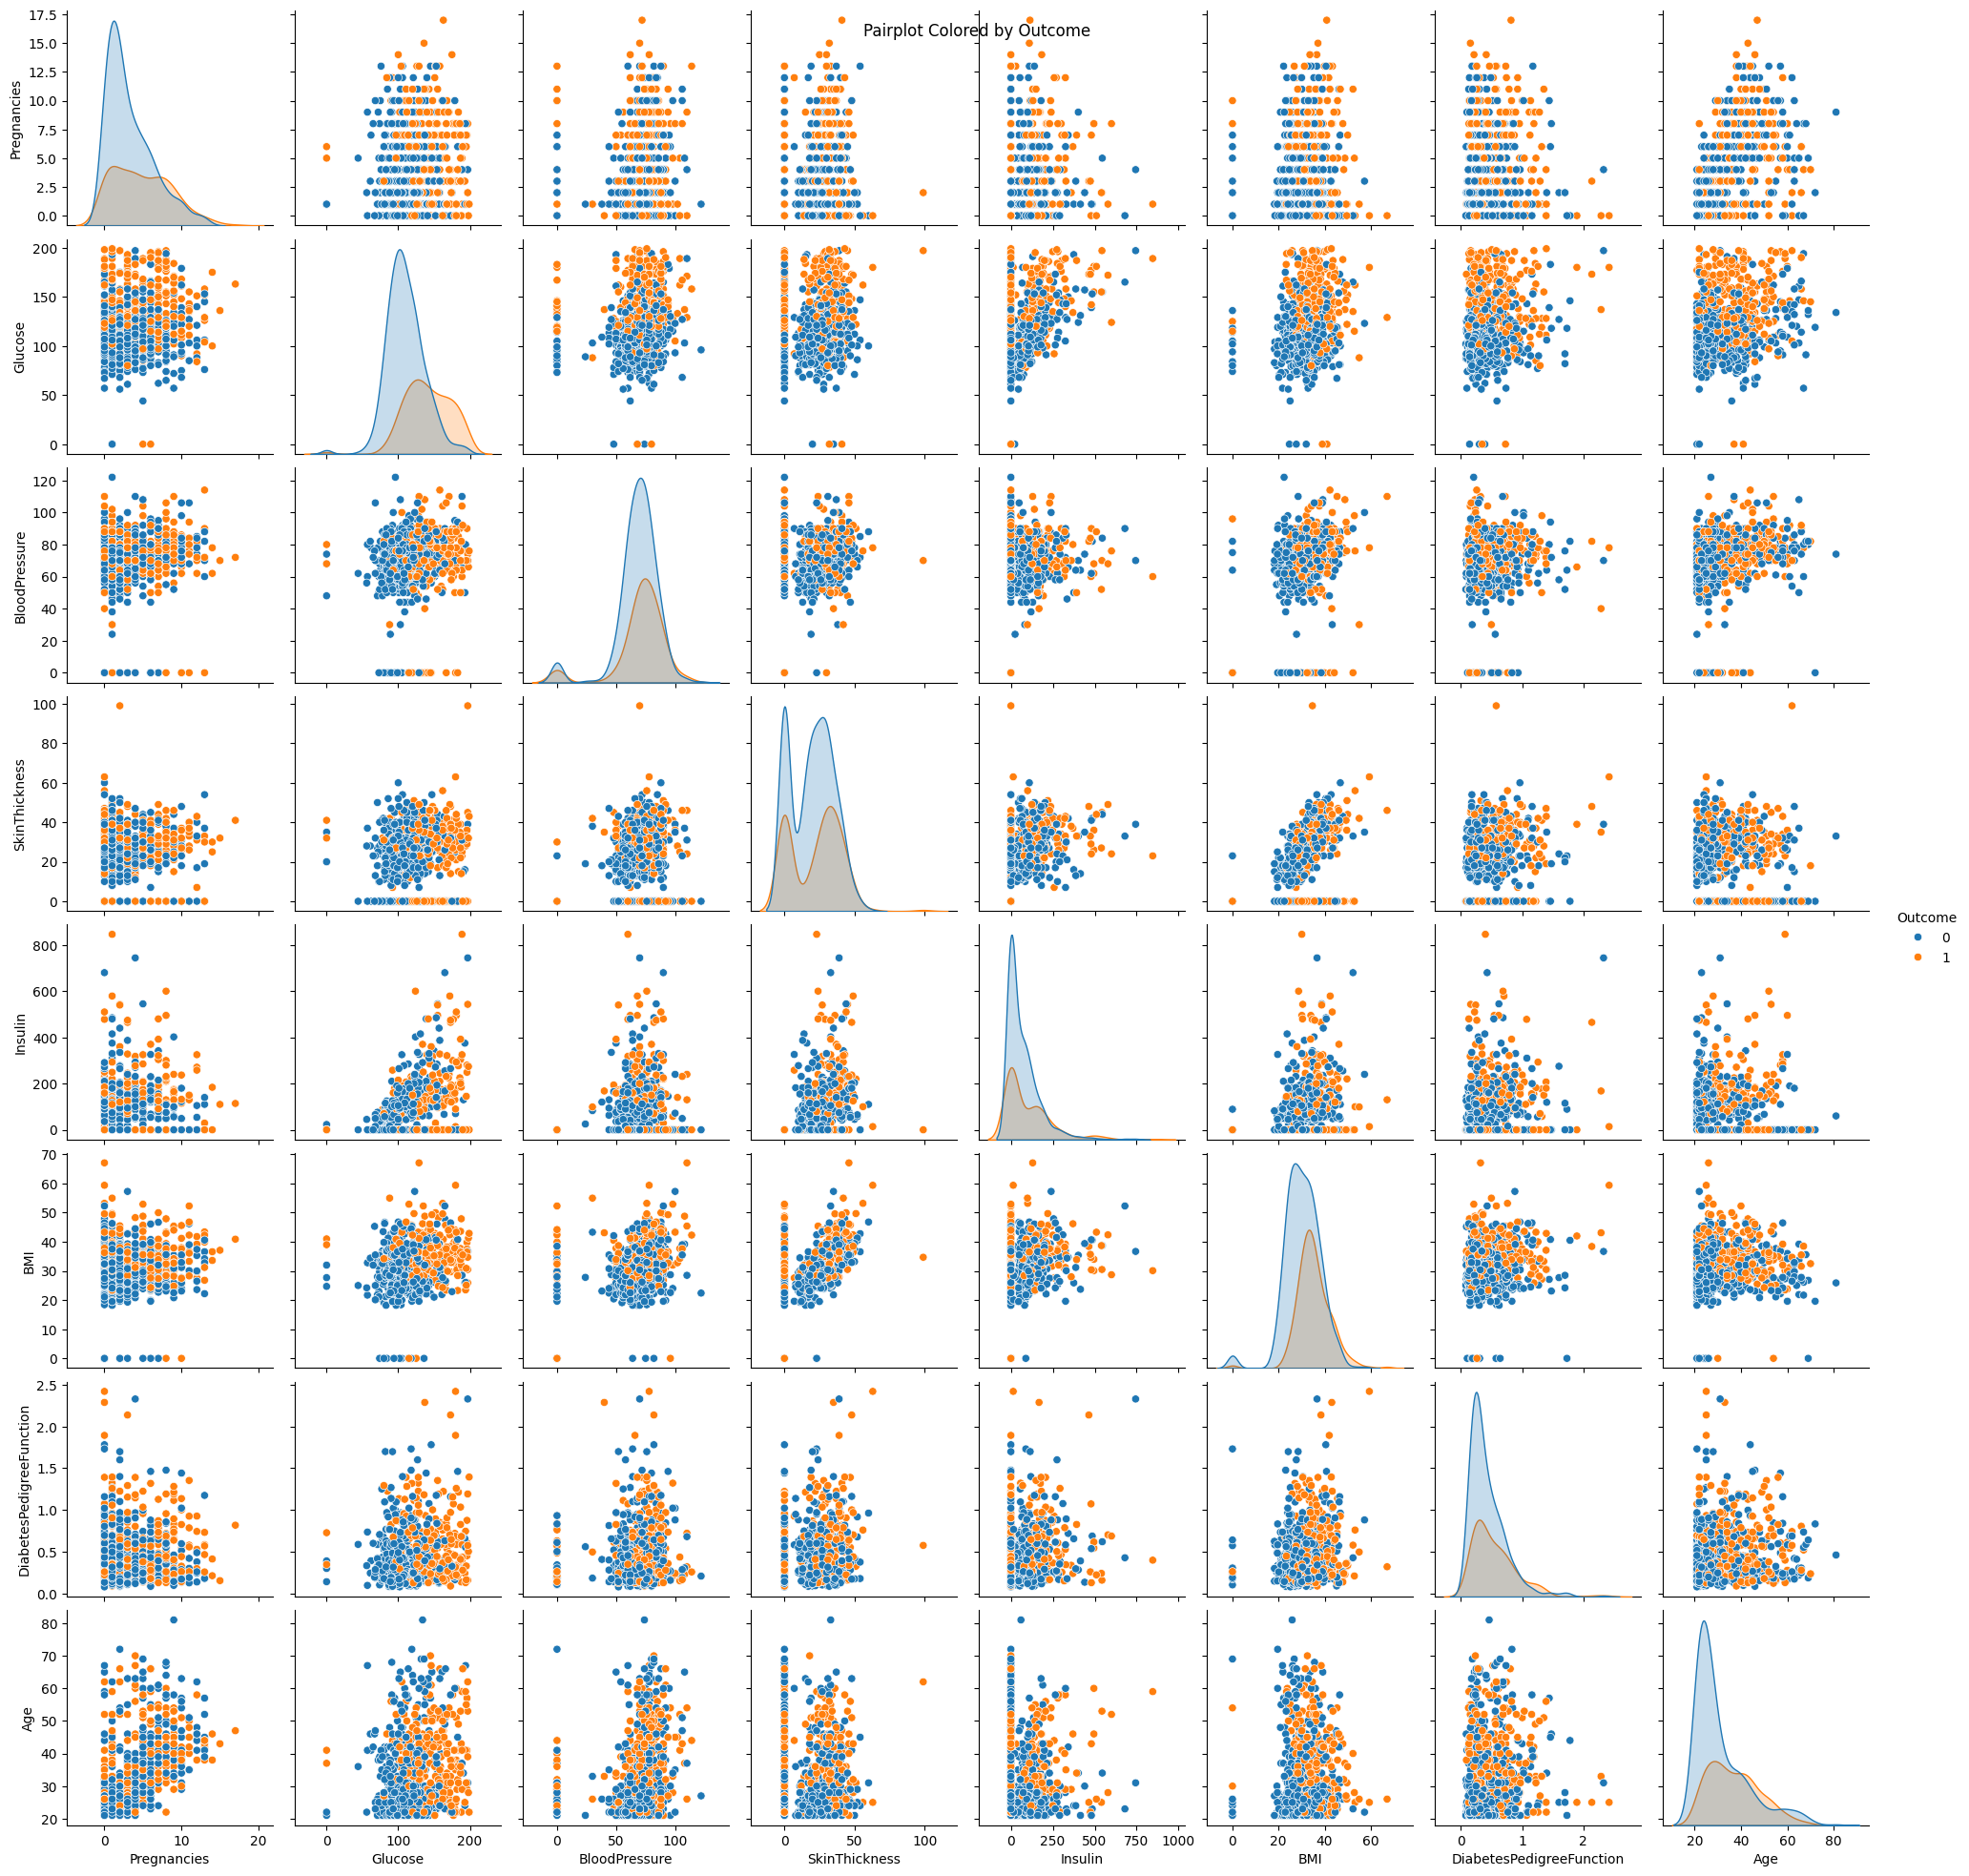

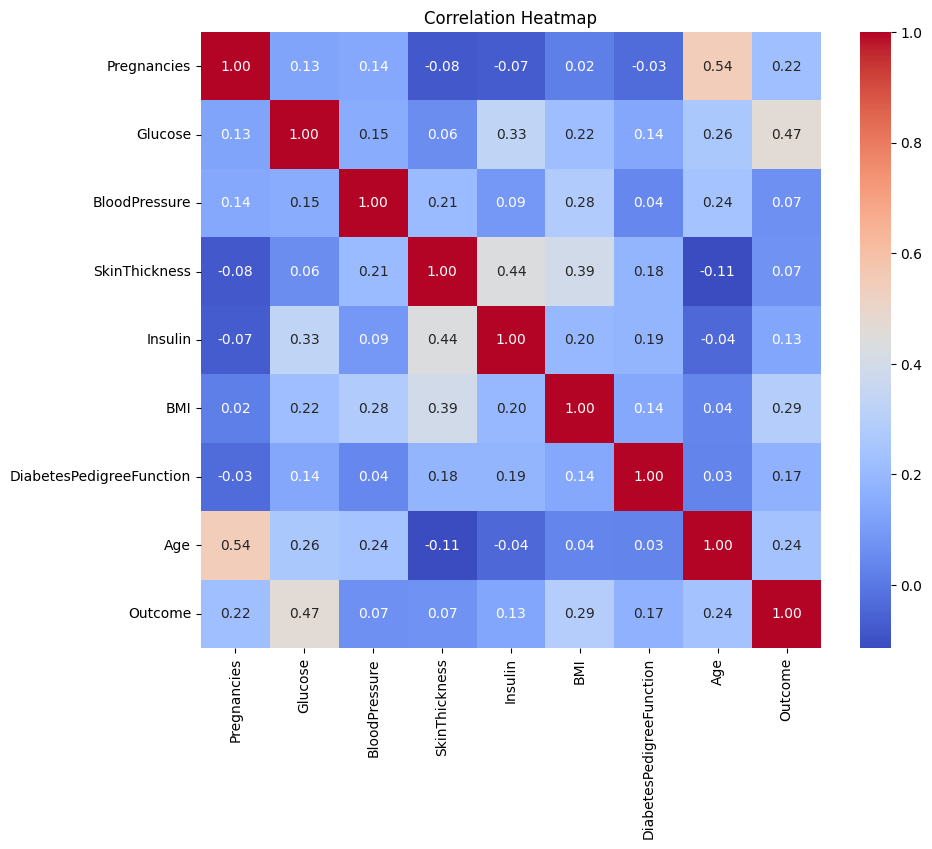

In [3]:
# Exploratory Data Analysis (EDA)

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Visualize distributions of numerical features
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Pairplot to see relations and class distribution (if target column exists)
if 'Outcome' in df.columns:
    sns.pairplot(df, hue='Outcome')
    plt.suptitle('Pairplot Colored by Outcome')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
# Data Preprocessing

# Handle missing values if any (assuming 0 means missing in some medical datasets)
# For the diabetes dataset, zero values in some columns could imply missing data for:
# 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI'
columns_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_with_zero_as_missing:
    zero_count = (df[col] == 0).sum()
    print(f'Number of zeros in {col}: {zero_count}')
    # Replace zeros with NaN for imputation
    df[col].replace(0, np.nan, inplace=True)

# Impute missing values with median (could also use mean or other strategies)
imputer = SimpleImputer(strategy='median')
df[columns_with_zero_as_missing] = imputer.fit_transform(df[columns_with_zero_as_missing])

print("\nMissing Values After Imputation:")
print(df.isnull().sum())

# Check duplicates
duplicate_count = df.duplicated().sum()
print(f'\nNumber of duplicate rows: {duplicate_count}')
# Drop duplicates if any
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print('Duplicates dropped.')

# Feature scaling (Standardization)
scaler = StandardScaler()
feature_cols = df.columns.difference(['Outcome']) if 'Outcome' in df.columns else df.columns
df[feature_cols] = scaler.fit_transform(df[feature_cols])

print("\nData after scaling (first 5 rows):")
print(df.head())

Number of zeros in Glucose: 5
Number of zeros in BloodPressure: 35
Number of zeros in SkinThickness: 227
Number of zeros in Insulin: 374
Number of zeros in BMI: 11

Missing Values After Imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Number of duplicate rows: 0

Data after scaling (first 5 rows):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1    -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2     1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.504422      -2.679076       0.670643  0.316566

/tmp/ipython-input-4-2883419939.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(0, np.nan, inplace=True)


In [5]:
# Save cleaned data for future use
df.to_csv('diabetes_preprocessed.csv', index=False)
print("Preprocessed data saved as 'diabetes_preprocessed.csv'.")

Preprocessed data saved as 'diabetes_preprocessed.csv'.
